- [Introduction to Linear Regression and Polynomial Regression***](https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb)
- [Polynomial Regression***](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)
-[Introduction to Polynomial Regression (with Python Implementation)](https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/)
- [Machine Learning: Polynomial Regression with Python](https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[Simple and Easy Explain Code | follow this link to understand Simply](https://ai.plainenglish.io/implementing-polynomial-regression-in-python-d9aedf520d56)

In [18]:
dataset=pd.read_csv('Pressure.csv')

In [19]:
dataset

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [20]:
x=dataset[["Temperature"]]

In [21]:
x

,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [22]:
y=dataset[["Pressure"]]

In [23]:
y

,Pressure
0,0.0002
1,0.0012
2,0.0060
3,0.0300
4,0.0900
5,0.2700


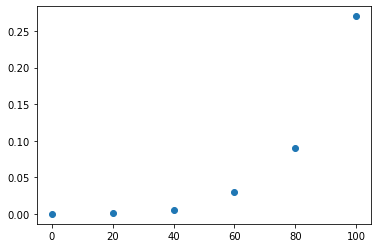

In [24]:
plt.scatter(x,y)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [26]:
Lin_reg_obj=LinearRegression()
Lin_reg_obj.fit(x,y)

LinearRegression()

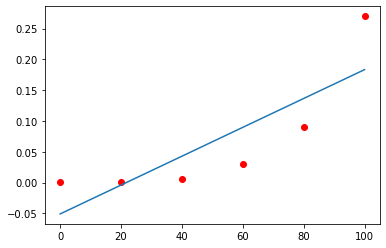

In [27]:
plt.plot(x,Lin_reg_obj.predict(x))
plt.scatter(x,y,color="r")

In [28]:
from sklearn.metrics import mean_squared_error, r2_score


In [35]:
rmse = np.sqrt(mean_squared_error(y,Lin_reg_obj.predict(x)))
print(rmse * 100 , "%")

5.357487802651124 %


In [36]:
r2 = r2_score(y,Lin_reg_obj.predict(x))
print(r2 * 100 , "%")

69.0349972603981 %


- Polynomial

In [37]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse*100,"%")
print(r2*100,"%")

2.0000258331664944 %
95.68461098911794 %


In [38]:
x_poly

array([[1.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02],
       [1.0e+00, 4.0e+01, 1.6e+03],
       [1.0e+00, 6.0e+01, 3.6e+03],
       [1.0e+00, 8.0e+01, 6.4e+03],
       [1.0e+00, 1.0e+02, 1.0e+04]])

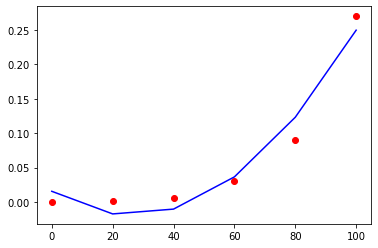

In [39]:
plt.scatter(x,y,color='red')
# plt.plot(x,model.predict(polynomial_features.fit_transform(x)),color='blue')
plt.plot(x,model.predict(x_poly),color='blue')

0.5556544356449004 %
99.66691251761722 %


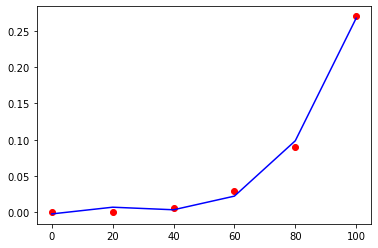

In [40]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse*100,"%")
print(r2*100,"%")
plt.scatter(x,y,color='red')
plt.plot(x,model.predict(polynomial_features.fit_transform(x)),color='blue')

0.16921934045842654 %
99.96910780718014 %


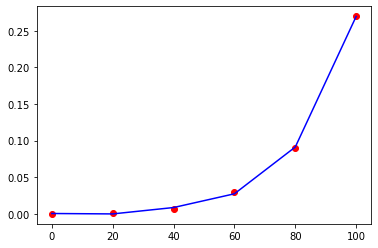

In [41]:
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse*100,"%")
print(r2*100,"%")
plt.scatter(x,y,color='red')
plt.plot(x,model.predict(polynomial_features.fit_transform(x)),color='blue')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("weatherHistory.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           96453 non-null  float64
 1   Apparent Temperature (C)  96453 non-null  float64
 2   Wind Speed (km/h)         96453 non-null  float64
 3   Wind Bearing (degrees)    96453 non-null  int64  
 4   Visibility (km)           96453 non-null  float64
 5   Cloud Cover               96453 non-null  int64  
 6   Pressure (millibars)      96453 non-null  float64
 7   Humidity                  96453 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 5.9 MB


In [4]:
dataset.head()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Humidity
0,9.472222,7.388889,14.1197,251,15.8263,0,1015.13,0.89
1,9.355556,7.227778,14.2646,259,15.8263,0,1015.63,0.86
2,9.377778,9.377778,3.9284,204,14.9569,0,1015.94,0.89
3,8.288889,5.944444,14.1036,269,15.8263,0,1016.41,0.83
4,8.755556,6.977778,11.0446,259,15.8263,0,1016.51,0.83


In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [7]:
X =dataset[["Pressure (millibars)"]]

In [11]:
X

,Pressure (millibars)
0,1015.13
1,1015.63
2,1015.94
3,1016.41
4,1016.51
...,...
96448,1014.36
96449,1015.16
96450,1015.66
96451,1015.95


In [8]:
x = preprocessing.scale(X)

In [9]:
x

array([[0.10168518],
       [0.1059598 ],
       [0.10861007],
       ...,
       [0.10621628],
       [0.10869557],
       [0.11049091]])

In [13]:


y = dataset.Humidity


In [14]:
y

0        0.89
1        0.86
2        0.89
3        0.83
4        0.83
         ... 
96448    0.43
96449    0.48
96450    0.56
96451    0.60
96452    0.61
Name: Humidity, Length: 96453, dtype: float64

In [15]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
